In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.manifold import TSNE

#### 1. Data Processing

In [6]:
# Load spreadsheet
pd.set_option('display.max_columns', None)  # or a specific number like 100
pd.set_option('display.max_rows', None)     # or a specific number like 100
pd.set_option('display.width', 2000)        # or desired width
pd.set_option('display.max_colwidth', None)    # or any desired column width
df = pd.read_excel('drq.xlsx', engine='openpyxl')
df

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje,NaN,"Den kollektive trafik bør være billig og tilgængelig for så mange som muligt, desuden er biltrafik en af de helt store klimasyndere",Det er dyrt for statskassen at opretholde driften af busser og tog. Et godt vejnet er vigtigt for erhvervslivet og skaber arbejdspladser,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhøjeste indkomster,NaN,"Historisk rammer kriser de fattigste hårdest. En såkaldt millionærskat vil mindske uligheden i samfundet og styrke sammenhængskraften. Den kan samtidig bidrage til statskassen i en tid, hvor velfærdsudgifterne er stigende","Det danske samfund er et af de mest lige samfund i verden. I forvejen bidrager de rigeste mest til fælleskassen målt i kroner og øre. En millionærskat kan betyde, at flere flytter deres formuer til udlandet, og dermed kan Danmark gå glip af vigtige investeringer og skatteindtægter",0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder skal straffes særligt hårdt,NaN,"Den mest effektive måde at stoppe bandekriminalitet er at indføre højere straffe i de områder, hvor banderne huserer","Det er urimeligt, at den samme forbrydelse skal straffes forskelligt i forskellige dele af landet",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertallet på Christiansborg ikke frit bestemme, hvilke love og regler, der skal gælde i Danmark. Politisk selvbestemmelse er vigtigere end at være med i et internationalt fællesskab","Danmark er bedst tjent med at være en del af EU-samarbejdet. Det har både økonomisk og politisk betydning at være med, og det styrker Danmarks placering globalt at være en del af verdens største handelsblok",0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret",NaN,"Ruslands angreb på Ukraine har ændret alting og øget truslen mod Danmark og Europa. Det er derfor vigtigt, at vi har et stærkt forsvar","Vi er medlemmer af Nato og har i forvejen et stort forsvar. Det er mere fornuftigt at anvende pengene på bedre skoler, børnepasning og ældrepleje",0,1,FT,NaN
5,537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere",NaN,"Økonomisk ulighed afspejler belønningen den enkelte kan opnå ved at gøre en ekstra indsats. Det er med til at skabe dynamik og udvikling i samfundet, og kan på den måde sikre størst mulig velstand til alle","Større økonomisk ulighed vil skævvride samfundet og skabe større forskel mellem rig og fattig. De dårligst stillede vil miste muligheder, og sammenhængskraften i samfundet vil blive svækket",0,1,FT,NaN
6,538,UDDANNELSE,Forældres indkomst skal være et af kriterierne for fordeling af elever i gymnasiet,NaN,Det er vigtigt at vores gymnasier består af unge fra alle grupper af samfundet. Med fordeling efter indkomst sikres blandede gymnasier,De unge risikerer at miste pladsen på deres nærmeste eller foretrukne gymnasium alene på grund af forældres indkomst,0,1,FT,NaN
7,540,VELFÆRD,Det skal være muligt at tjene penge på at drive private børnehaver og vuggestuer,NaN,"Der er brug for en bred vifte af forskellige dagtilbud – særligt i yderområderne. Hvis man ikke må tjene penge på at drive institution, får vi et dårligere udbud",Skattekroner tiltænkt velfærd skal ikke kunne blive trukket ud som profit og ende i lommen på en privat dagtilbudsejer,0,1,FT,NaN
8,541,ARBEJDSMARKED OG ØKONOMI,Der skal indføres skat på fortjenesten ved salg af bolig,NaN,"Det er kun rimeligt, at man betaler skat af store gevinster fra boligsalg, og det kan også hjælpe med at holde boligpriserne lidt nede","Det er mere sikkert for alle, at boligejere betaler ejendomsskatter løbende som nu. Der er ingen garanti for, at ens bolig 

In [7]:
df = df[df['parti'] != 'Løsgænger']
df.dropna()
print(df.shape, f"- {df.shape[0]} rows with {df.shape[1]} features")

KeyError: 'parti'

In [ ]:
# 4 columns of data (cm), going to use PCA
# with 4 columns of result.
# The explained_variance_ratio_ tells us that
# by using 1 principal component, we will get
# 73% of the variance

df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

X_s = preprocessing.StandardScaler().fit_transform(X)
pca4 = decomposition.PCA(n_components=None)
res4 = pca4.fit_transform(X_s)
pca4.explained_variance_ratio_

array([0.41737636, 0.10259865, 0.04976015, 0.04300927, 0.0293233 ,
       0.0237033 , 0.01994712, 0.01697463, 0.01676652, 0.01608279,
       0.01527152, 0.01449084, 0.01303718, 0.01297392, 0.01200226,
       0.01125725, 0.0102922 , 0.00997773, 0.00986747, 0.00966786,
       0.00928391, 0.0089641 , 0.00877818, 0.00786085, 0.00755989,
       0.00722701, 0.00682415, 0.00670982, 0.00626662, 0.00605007,
       0.00582534, 0.0055948 , 0.0052595 , 0.00505699, 0.00473416,
       0.00466639, 0.00453667, 0.00416406, 0.00398844, 0.00388108,
       0.00341904, 0.00330379, 0.0029882 , 0.00290354, 0.00251036,
       0.00244041, 0.00210387, 0.00141116, 0.00130729])

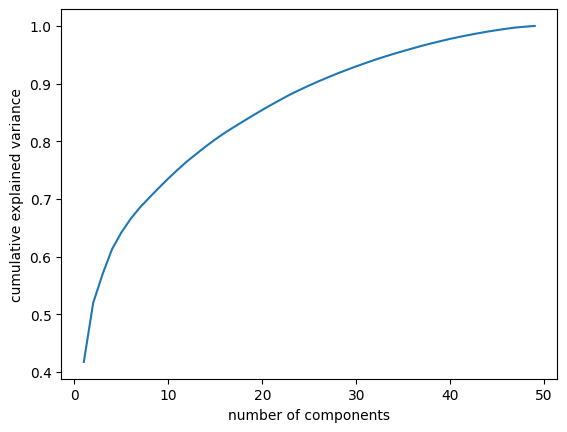

In [ ]:
x = list(range(1, 1 + len(pca4.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.gca().invert_yaxis()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

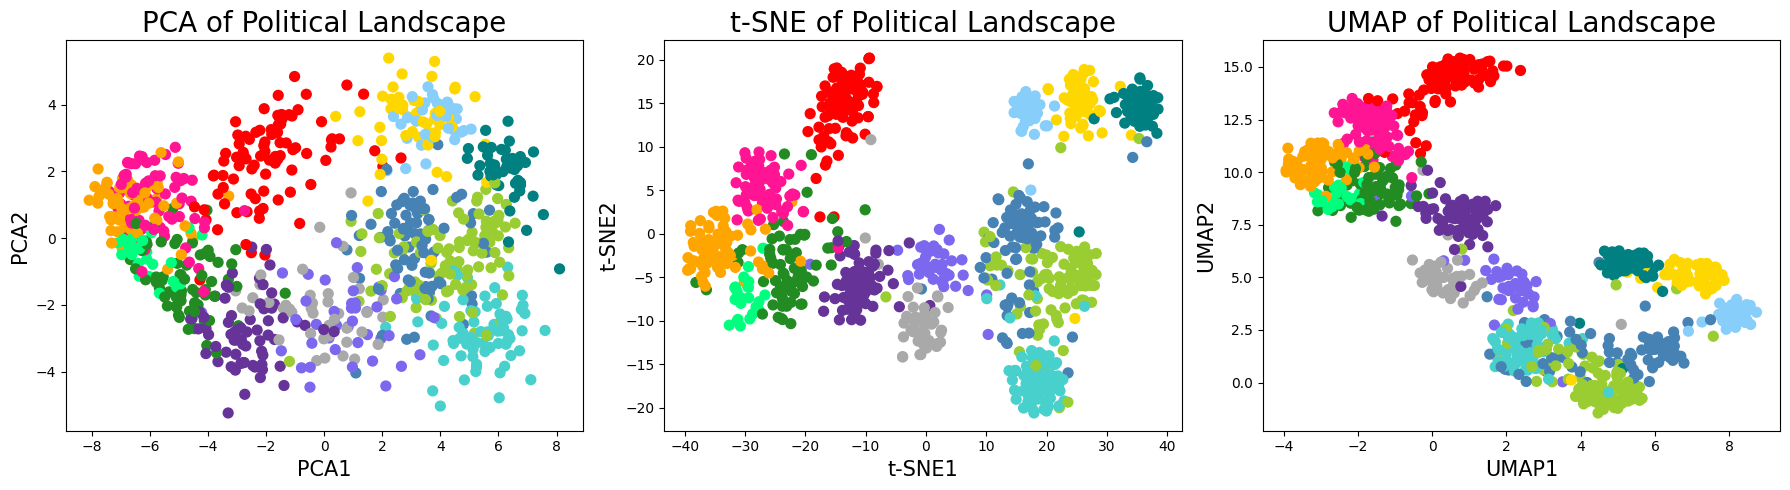

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Loading the data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')

# Extracting the numerical data
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
principalComponents_tsne = tsne.fit_transform(X_standardized)

# Applying UMAP
umap_results = umap.UMAP(n_neighbors=20, min_dist=0.5, metric='correlation').fit_transform(X_standardized)

# Converting to DataFrames
dfs = {
    'PCA': pd.DataFrame(data=principalComponents_pca, columns=['PCA1', 'PCA2']),
    't-SNE': pd.DataFrame(data=principalComponents_tsne, columns=['t-SNE1', 't-SNE2']),
    'UMAP': pd.DataFrame(data=umap_results, columns=['UMAP1', 'UMAP2'])
}

for key, value in dfs.items():
    dfs[key] = pd.concat([value, df[['navn', 'parti']]], axis=1)
    dfs[key] = dfs[key].dropna()
    dfs[key] = dfs[key][dfs[key]['parti'] != 'Løsgænger']

party_colors = {
    'Socialdemokratiet' : 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Map colors
for key, value in dfs.items():
    dfs[key]['color'] = dfs[key]['parti'].map(party_colors)

# Visualizing
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusted for a single row with 3 columns

titles = ['PCA of Political Landscape', 't-SNE of Political Landscape', 'UMAP of Political Landscape']

for ax, key, title in zip(axes, dfs, titles):
    ax.scatter(dfs[key][dfs[key].columns[0]], dfs[key][dfs[key].columns[1]], c=dfs[key]['color'], s=50)
    ax.set_xlabel(dfs[key].columns[0], fontsize=15)
    ax.set_ylabel(dfs[key].columns[1], fontsize=15)
    ax.set_title(title, fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()


#### 2) An analysis/description of which questions are most crucial concerning their placement on the axes.

Analysis of importance of the original features using squared loadings:

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

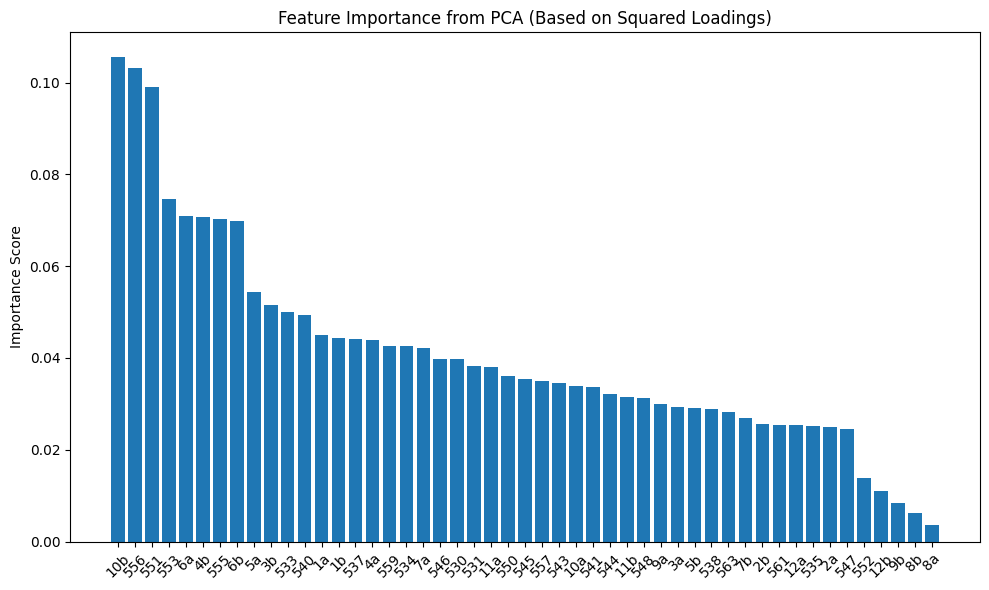

In [ ]:
# Load and extract the numerical data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# 1. Compute squared loadings for each feature on each principal component
squared_loadings = np.square(pca.components_.T)

# 2. Sum the squared loadings for each feature across all components
feature_importance = np.sum(squared_loadings, axis=1)

# 3. Rank features based on their importance
sorted_index = np.argsort(feature_importance)[::-1]

# 4. Visualize feature importance
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(np.array(features)[sorted_index], feature_importance[sorted_index])
plt.title('Feature Importance from PCA (Based on Squared Loadings)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


_**Meaning of squared loading:**_<br/>

In a simple context, the squared loading of a feature on one given PC represents the amount of variance of that feature captured by that specific PC.
In our example however we have 2 PCs, and we perform an additional calculation by summing the squared loadings across all PCs which 
gives the total amount of variance of a feature captured by the entire PCA.

_**Meaning of the graph:**_<br/>

Afterwards we sort the original features (the political questions) by how well their variance is represented in the PCA-transformed space as shown exactly in the picture above.

_**Conclusions:**_<br/>
From it we conclude that based on the square loading metric, the top 6 most "important" questions in descending order are:<br/>

10b - "The so-called Arne pension, which gives the possibility of an earlier pension, must be maintained, even if there is a shortage of labour."<br/>
556 - "The so-called Arne pension must be abolished."<br/>
551 - "There must be permanent border control between Denmark and Germany."<br/>
553 - "More education places must be relocated from the big cities."<br/>
6a  - "The Danish immigration policy is too strict."<br/>
4b  - "The state should compensate the Danes to a greater extent for the rising prices that inflation has brought about."<br/>

Seems like the topic of "Arne pension" is the most "polarizing" in the questionnaires of both tv stations.

Analysis of importance of the original features based on the correlation with the PCs:

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

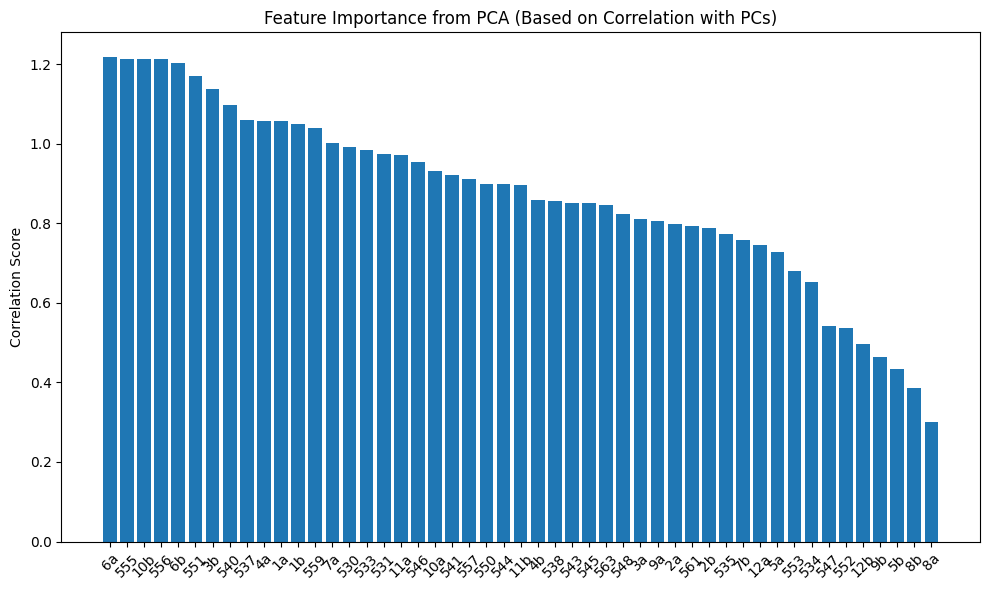

In [ ]:
# Load and extract the numerical data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# 1. Convert PCs to a DataFrame for correlation computation
df_pca = pd.DataFrame(principalComponents_pca, columns=['PC1', 'PC2'])

# 2. Add original features to the DataFrame
for col in X.columns:
    df_pca[col] = X_standardized[:, X.columns.get_loc(col)]

# 3. Compute absolute correlation between original features and PCs
correlation_matrix = df_pca.corr().iloc[:2, 2:].abs().transpose()

# 4. Sum the correlations for each feature
feature_correlation = correlation_matrix.sum(axis=1)

# 5. Rank and visualize features based on summed correlation with PCs
sorted_index = feature_correlation.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(feature_correlation.index[sorted_index], feature_correlation.values[sorted_index])
plt.title('Feature Importance from PCA (Based on Correlation with PCs)')
plt.ylabel('Correlation Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

_**Meaning of a feature correlating with a given PC:**_<br/>
The correlation between an original feature and a PC measures how strongly that feature varies (linearly) with that PC. A high absolute correlation means that when the PC increases, the feature tends to either increase (positive correlation) or decrease (negative correlation) in a consistent manner.

When correlating features with PCs, we're looking at how much of the feature's variance aligns with the variance captured by the PCs.
It gives a good measure of the feature's importance in the PCA-transformed space, which is exactly what we're looking for.

_**Difference between squared loading and correlating with PCs:**_<br/>
The key point to understand the difference between the two is that squared loadings directly account for how much variance of a feature is captured by the PCA, the correlation approach emphasizes how each feature varies in alignment with the PCs.

In some cases, for example feature 6a may have moderate squared loadings across many PCs but still have a strong correlation with a specific PC, indicating it's particularly influential for that PC.

_**Meaning of the graph:**_<br/>

We sort the original features (the political questions) in descending order by how how much of the original feature's variance aligns with the variance captured by the PCs.

_**Conclusions:**_<br/>
From it we conclude that based on the correlation with PCs metric, the top 6 most "important" questions in descending order are:<br/>

6a  - "The Danish immigration policy is too strict."<br/>
555 - "Asylum seekers should be sent to a country outside the EU - e.g. Rwanda - while their application is being processed"<br/>
10b - "The so-called Arne pension, which allows for earlier retirement, must be maintained, even if there is a shortage of labour."<br/>
556 - "Den såkaldte Arne-pension skal afskaffes"<br/>
6b  - "It would be a good idea to establish a Danish asylum reception center in Rwanda."<br/>
551 - "There must be permanent border control between Denmark and Germany"<br/>

Here however the topics of "Arne pension", "immigration control" and "asylum in Rwanda" are the most "polarizing" in the questionnaires of both tv stations.<br/>
Furthermore common to both metrics is the topic of "Arne pension" which looks to be the most important.

/var/folders/22/rg8206c93c77krq73zpytwzr0000gn/T/ipykernel_39303/2994575220.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


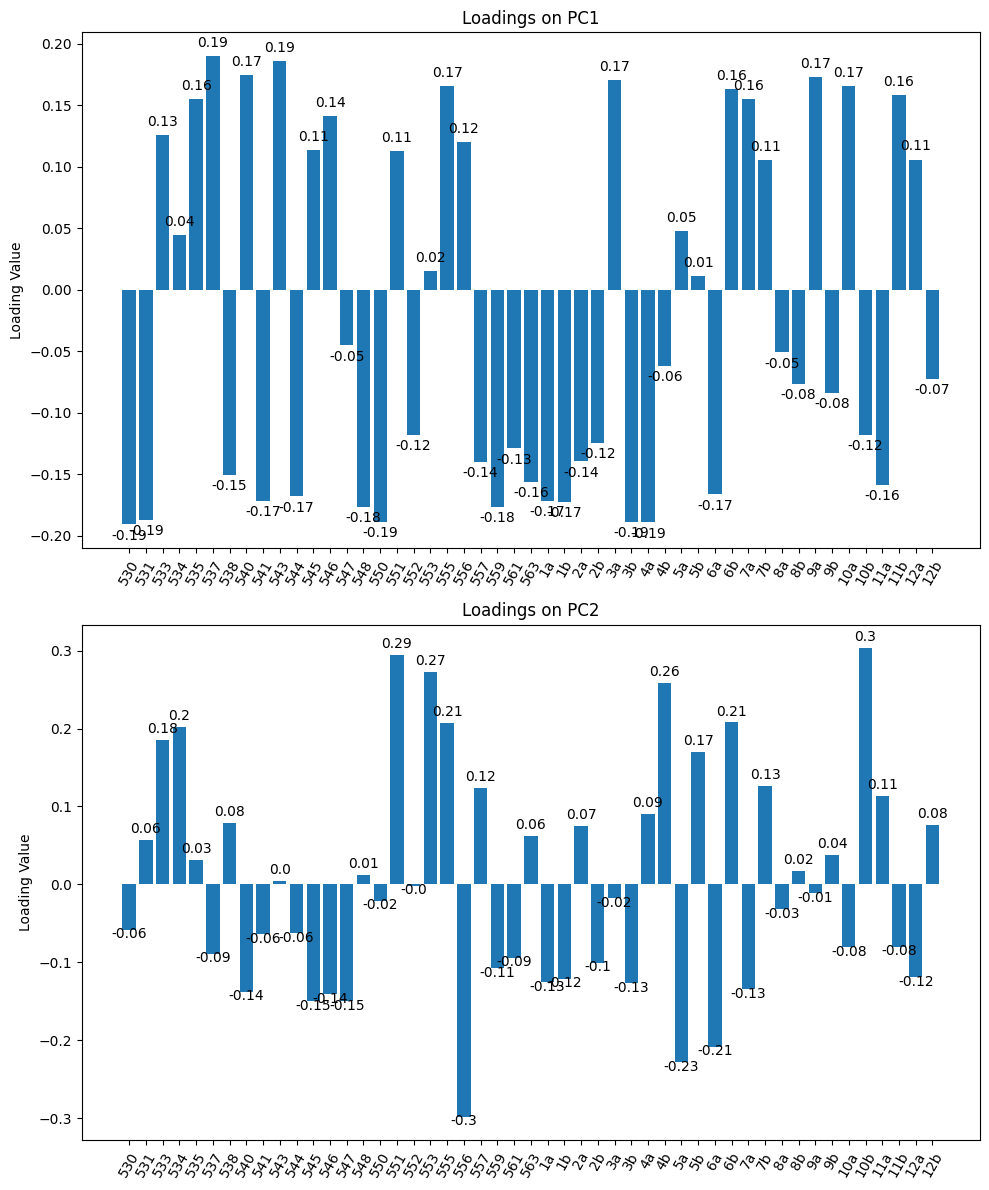

In [ ]:
# Extract loadings from PCA
loadings = pca.components_.T

# Visualize loadings
plt.figure(figsize=(10, 12))  # Adjust figure width and height

# Create a bar plot for loadings on PC1
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
bars1 = plt.bar(features, loadings[:, 0])
plt.title('Loadings on PC1')
plt.ylabel('Loading Value')
plt.xticks(rotation=60)  # Adjust rotation

# Annotate with metric values for PC1
for bar in bars1:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 0.015, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

# Create a bar plot for loadings on PC2
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
bars2 = plt.bar(features, loadings[:, 1])
plt.title('Loadings on PC2')
plt.ylabel('Loading Value')
plt.xticks(rotation=60)  # Adjust rotation

# Annotate with metric values for PC2
for bar in bars2:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 0.015, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

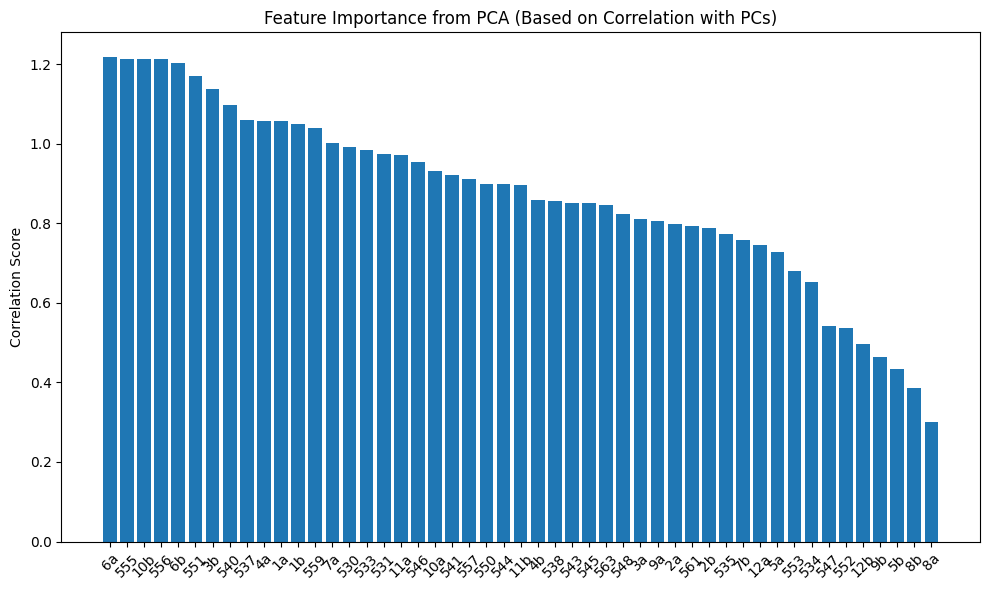

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the data
df = pd.read_excel('alldata.xlsx', engine='openpyxl')

# Extracting the numerical data
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X_standardized)

# Convert PCs to a DataFrame for correlation computation
df_pca = pd.DataFrame(principalComponents_pca, columns=['PC1', 'PC2'])

# Add original features to the DataFrame
for col in X.columns:
    df_pca[col] = X_standardized[:, X.columns.get_loc(col)]

# Compute absolute correlation between original features and PCs
correlation_matrix = df_pca.corr().iloc[:2, 2:].abs().transpose()

# Sum the correlations for each feature
feature_correlation = correlation_matrix.sum(axis=1)

# Rank and visualize features based on summed correlation with PCs
sorted_index = feature_correlation.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(feature_correlation.index[sorted_index], feature_correlation.values[sorted_index])
plt.title('Feature Importance from PCA (Based on Correlation with PCs)')
plt.ylabel('Correlation Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6a) Flygtninge og indvandrere | Den danske udlændingepolitik er for stram
Refugees and immigrants The Danish immigration policy is too strict.

#### 10b) Socialområdet	Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft.	
The social area The so-called Arne pension, which gives the possibility of an earlier pension, must be maintained, even if there is a shortage of labour.

#### 551)
EU OG UDENRIGS	
EU AND ABROAD

Der skal være permanent grænsekontrol mellem Danmark og Tyskland	
There must be permanent border control between Denmark and Germany

For
Det er vigtigt, at der er styr på, hvem der kommer ind i Danmark. Det gælder både i forhold til organiseret kriminalitet og til indvandring. Det er vigtigere, end at Danmark er med i EU’s Schengen-samarbejde om åbne grænser

It is important that there is control over who enters Denmark. This applies both to organized crime and to immigration. It is more important than Denmark being part of the EU's Schengen cooperation on open borders

Against
Grænsekontrollen koster milliarder, skaber kødannelse og generer den fri bevægelighed i grænselandet i et omfang, der ikke står mål med dens resultater. Gøres den permanent, kan Danmark bliver smidt ud af EU’s Schengen-samarbejde om åbne grænser

Border control costs billions, creates queues and disrupts free movement in the border country to an extent that is not commensurate with its results. If it is made permanent, Denmark could be thrown out of the EU's Schengen cooperation on open borders

#### 556) ARBEJDSMARKED OG ØKONOMI
LABOR MARKET AND ECONOMY

Den såkaldte Arne-pension skal afskaffes	
The so-called Arne pension must be abolished I

Arne-pensionen er dyr og ikke målrettet de mest nedslidte. I stedet bør vi se på ordninger for danskere, der reelt er nedslidte
The Arne pension is expensive and not aimed at the most worn-out. Instead, we should look at schemes for Danes who are really worn out

Det er kun retfærdigt, at danskere med flest aktive år på arbejdsmarkedet har en ret til at trække sig tidligere tilbage, så de kan få nogle gode år som pensionister uden at være helt nedslidte
It is only fair that Danes with the most active years on the labor market have the right to retire earlier, so that they can have a few good years as pensioners without being completely worn out


### Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.

In [8]:
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
data = df[df['parti'] != 'Løsgænger']
#get the names of all parties
parties = data['parti'].unique()
parties

#get the ids, questions and question category from the different medias
#DR
drq = pd.read_excel('drq.xlsx', engine='openpyxl')
drq = drq.drop(['Info', 'ArgumentFor', 'ArgumentAgainst', 'WordMerger', 'ID_CandidateQuestionType', 'Rule', 'QuestionListData'], axis=1)
drq['ID'] = drq['ID'].astype('string')
#TV2
tv2q = pd.read_excel('tv2q.xlsx', engine='openpyxl')
tv2q = tv2q.drop(['type', 'depends'], axis=1)
ids = {'1a', '1b', '2a', '2b', '3a', '3b','4a', '4b','5a', '5b','6a', '6b','7a', '7b','8a', '8b','9a', '9b','10a', '10b','11a', '11b','12a', '12b' }
tv2q = tv2q[tv2q['id'].isin(ids)]

#rename columns so that we can concant them together
tv2q = tv2q.rename(columns={"ID": "id", "header": "title", "Question": "question"})
drq = drq.rename(columns={"ID": "id", "Title": "title", "Question": "question"})

#make a new df for the questions and the median of the party members's answers
questions = pd.concat([drq, tv2q], ignore_index = True)
questions = questions.set_index('id')

#calculate the median for each question of reach party  and add it to the column
for party in parties:
    subset = data[data['parti'] == party]
    subset = subset.drop(['navn', 'parti', 'storkreds', 'alder'], axis=1)
    medians = subset.median()
    medians_df = pd.DataFrame(medians, columns=[party])
    medians_df.index.name = 'id'
    questions = questions.join(medians_df)

questions

,title,question,Moderaterne,Socialistisk Folkeparti,Alternativet,Enhedslisten,Danmarksdemokraterne,Venstre,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Dansk Folkeparti,Kristendemokraterne,Liberal Alliance,Nye Borgerlige,Det Konservative Folkeparti,Radikale Venstre,Socialdemokratiet
id,,,,,,,,,,,,,,,,
530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje,1.0,2.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhøjeste indkomster,1.0,2.0,1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,-2.0,-2.0,-1.0,1.0
533,RET OG STRAF,Kriminalitet begået i udsatte boligområder skal straffes særligt hårdt,-1.0,-2.0,-2.0,-2.0,2.0,1.0,-2.0,2.0,-2.0,-1.0,-1.0,1.0,-2.0,1.0
534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,-2.0,-2.0,-2.0,1.0,-1.0,-2.0,-2.0,2.0,-2.0,-1.0,2.0,-2.0,-2.0,-2.0
535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret",1.0,1.0,-1.0,-2.0,2.0,2.0,-2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere",1.0,-2.0,-2.0,-2.0,1.0,1.0,-2.0,1.0,-1.0,2.0,2.0,2.0,-1.0,-1.0
538,UDDANNELSE,Forældres indkomst skal være et af kriterierne for fordeling af elever i gymnasiet,-2.0,1.0,-1.0,1.0,-2.0,-2.0,-2.0,-2.0,-1.0,-2.0,-2.0,-2.0,-1.0,1.0
540,VELFÆRD,Det skal være muligt at tjene penge på at drive private børnehaver og vuggestuer,1.0,-2.0,1.0,-2.0,1.0,1.0,-2.0,1.0,1.0,2.0,2.0,2.0,1.0,-1.0
541,ARBEJDSMARKED OG ØKONOMI,Der skal indføres skat på fortjenesten ved salg af bolig,1.0,2.0,1.0,2.0,-2.0,-2.0,2.0,-2.0,-1.0,-2.0,-2.0,-2.0,1.0,-1.0
